In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import scipy 

%matplotlib inline

In [2]:
ess = pd.read_csv("ESSdata_Thinkful.csv")

In [3]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
# idno id numer
# year ess round
# tvtot tv watching, total time on average weekday
# ppltrst most can be trusted or you can't be too careful  -> 10 most can be trusted
# pplfair try to take advantage of you or try to be fair -> 10 try to be fair
# pplhlp 1 -> 10 try to be helpful
# happy 1 -> 10 happy
# sclmeet 1 -> 7 every day
# sclact 1 -> 5 5 being most
# gndr  1 is male
# agea  age of respondent, calculated
# partner 1 -> lives wibarth partner

In [5]:
ess['year'].unique()
# 6 -> 2012
# 7 -> 2014

array([6, 7])

## Question 1

Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

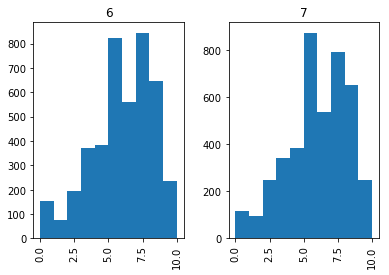

In [6]:
ess['ppltrst'].hist(by=ess['year']);

In [7]:
ess.groupby('year').count()

,cntry,idno,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
year,,,,,,,,,,,,
6,4297,4297,4291,4287,4277,4282,4276,4288,4251,4297,4171,4290
7,4297,4297,4295,4293,4278,4287,4287,4291,4249,4287,4184,4287


In [8]:
from scipy.stats import ttest_rel

In [9]:
ttest_rel(ess[ess['year'] == 6]['ppltrst'], ess[ess['year'] == 7]['ppltrst'], nan_policy='omit')

Ttest_relResult(statistic=0.075751680432698851, pvalue=0.93962019779999817)

## Question 2

Did people become happier from 2012 to 2014? Compute results for each country in the sample.

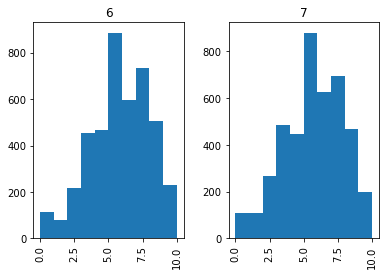

In [10]:
ess['pplhlp'].hist(by=ess['year']);

In [11]:
ttest_rel(ess[ess['year'] == 6]['pplhlp'], ess[ess['year'] == 7]['pplhlp'], nan_policy='omit')

Ttest_relResult(statistic=3.0229241001672169, pvalue=0.0025183136243636045)

## Question 3

Who reported watching more TV in 2012, men or women?

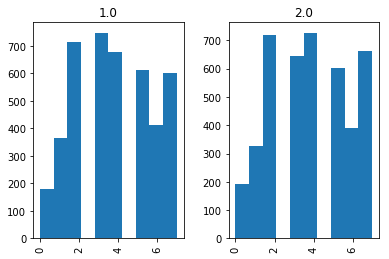

In [12]:
ess['tvtot'].hist(by=ess['gndr']);

In [13]:
from scipy.stats import ttest_ind

In [14]:
ttest_ind(ess[((ess['year'] == 6) & (ess['gndr'] == 1))]['tvtot'],
         ess[((ess['year'] == 6) & (ess['gndr'] == 2))]['tvtot'],
         nan_policy='omit')

Ttest_indResult(statistic=-0.68999281092095022, pvalue=0.49023604027095813)

## Question 4

Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

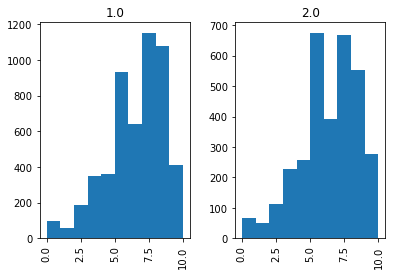

In [15]:
ess['pplfair'].hist(by=ess['partner']);

In [16]:
ttest_ind(ess[((ess['year'] == 6) & (ess['partner'] == 1))]['pplfair'],
         ess[((ess['year'] == 6) & (ess['partner'] == 2))]['pplfair'],
         nan_policy='omit')

Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609876207)

# Question 5

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [17]:
ess['cntry'].value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

In [18]:
countries = ['ES', 'SE', 'CH']

In [19]:
ess_c = ess[ess['cntry'].isin(countries)]

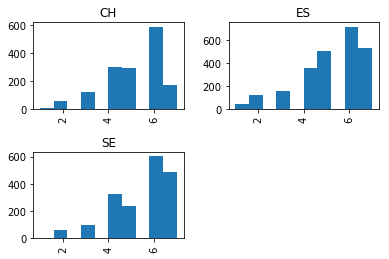

In [20]:
ess_c['sclmeet'].hist(by=ess['cntry']);

In [21]:
# non-normal
from scipy.stats import kruskal

In [22]:
kruskal(ess_c[((ess_c['cntry'] == 'ES') & (ess_c['year'] == 7))]['sclmeet'],
        ess_c[((ess_c['cntry'] == 'SE') & (ess_c['year'] == 7))]['sclmeet'],
        ess_c[((ess_c['cntry'] == 'CH') & (ess_c['year'] == 7))]['sclmeet'],
    nan_policy='omit')

KruskalResult(statistic=20.974963481937596, pvalue=2.7883324361335602e-05)

# Question 6

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

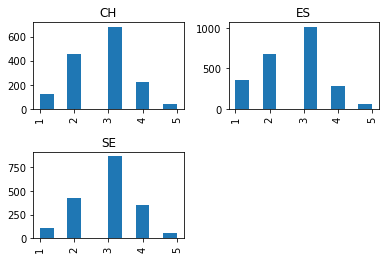

In [23]:
ess_c['sclact'].hist(by=ess['cntry']);

In [24]:
# normal
from scipy.stats import f_oneway

In [25]:
ess_anova = ess_c.dropna(axis=0, subset=['sclact'])

In [26]:
f_oneway(ess_anova[((ess_anova['cntry'] == 'ES') & (ess_anova['year'] == 7))]['sclact'],
        ess_anova[((ess_anova['cntry'] == 'SE') & (ess_anova['year'] == 7))]['sclact'],
        ess_anova[((ess_anova['cntry'] == 'CH') & (ess_anova['year'] == 7))]['sclact'])

F_onewayResult(statistic=22.028167439547563, pvalue=3.2096123170558474e-10)